<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/KNN_SVC_Gridserach_HeratDiseasesCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [4]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

خانم هایی که کلسترول بالای 150 و مریض نیستند

In [6]:
data2=data[data['sex']==0]

In [7]:
data2=data2[data2['chol']>150]

In [8]:
data2=data2[data2['target']==0]
res=data2['chol'].mode()
# res[0]
data2[data2['chol']==(data2['chol'].mode()[0])].count()


age         2
sex         2
cp          2
trestbps    2
chol        2
fbs         2
restecg     2
thalach     2
exang       2
oldpeak     2
slope       2
ca          2
thal        2
target      2
dtype: int64

In [9]:
data2.groupby('sex')['target'].count()

sex
0    24
Name: target, dtype: int64

In [10]:
data_female=data[data['sex']==0]

In [11]:
data_male=data[data['sex']==1]

<Axes: xlabel='target', ylabel='count'>

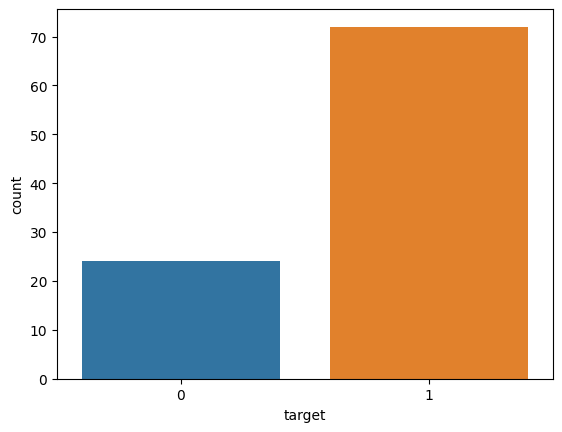

In [12]:
sns.countplot(data=data_female, x='target')

<Axes: xlabel='target', ylabel='count'>

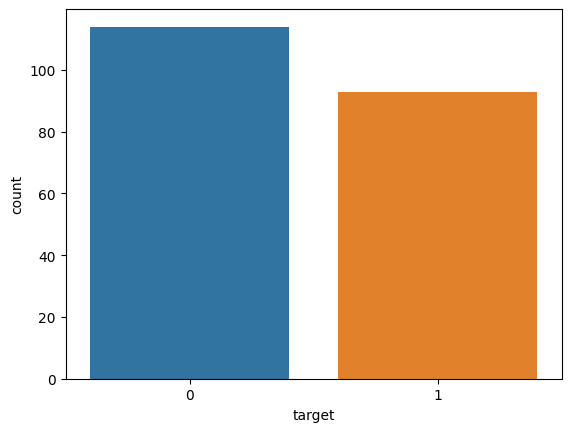

In [13]:
sns.countplot(data=data_male, x='target')

<Axes: xlabel='age', ylabel='fbs'>

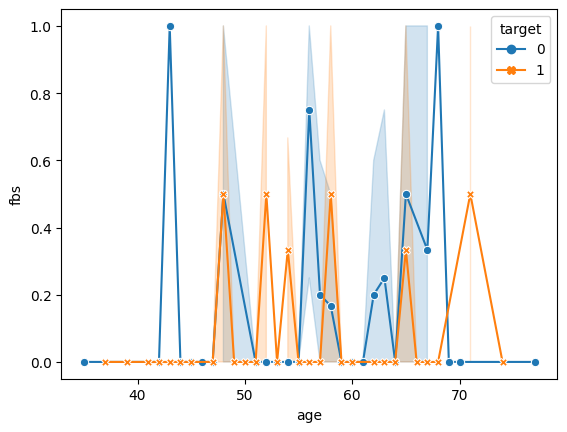

In [14]:
sns.lineplot(data=data[data['chol']>=250], x='age', y='fbs',
             hue="target", style="target",
             markers=True, dashes=False)

<Axes: xlabel='sex', ylabel='count'>

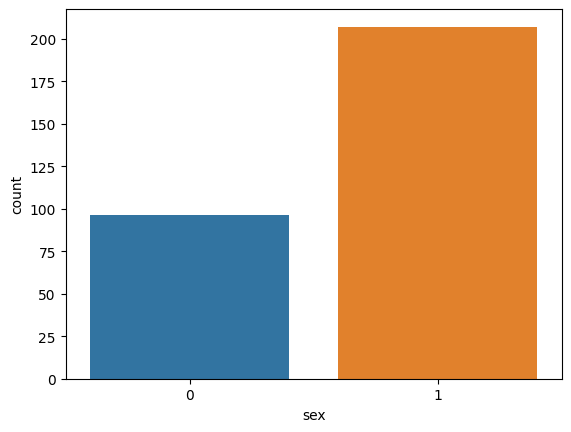

In [15]:
sns.countplot(data=data, x='sex')

<Axes: >

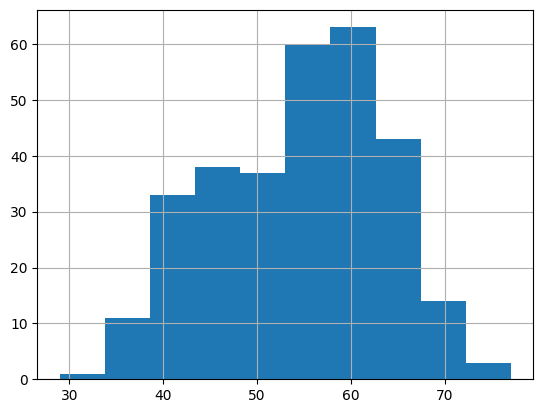

In [16]:
data['age'].hist()

In [17]:
X = data.iloc[:, :-1].values # make feature from dataframe
y = data.iloc[:, -1].values # make target of dataframe

In [18]:
X1=data.iloc[0:100, :]
X1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X2=data.iloc[0:100, :-1]

In [20]:
X2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
# np.shape(X)
X.shape

(303, 13)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [24]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        33
           1       0.74      0.65      0.69        43

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.68      0.67      0.67        76



In [27]:
print(confusion_matrix(y_test, y_pred))

[[23 10]
 [15 28]]


In [28]:
import seaborn as sb
import matplotlib.pyplot as plt

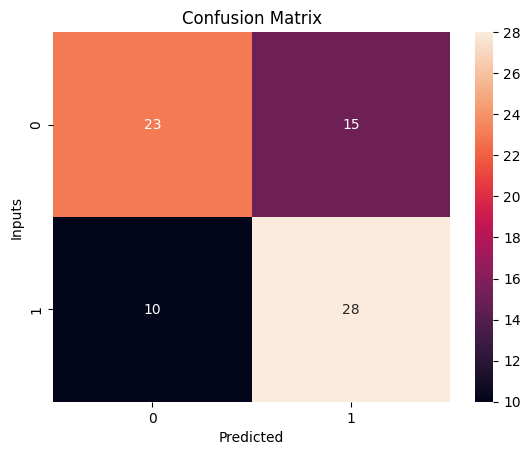

In [29]:
cm = confusion_matrix(y_pred, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Inputs")
plt.title("Confusion Matrix")
plt.show()

In [30]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59        33
           1       0.69      0.72      0.70        43

    accuracy                           0.66        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.66      0.66      0.66        76



In [31]:
from sklearn.svm import SVC

In [32]:
svc_model = SVC(C=15, kernel='linear', random_state=3244)
svc_model.fit(X_train, y_train)
y_pred_csv = clf.predict(X_test)
print(classification_report(y_test, y_pred_csv))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59        33
           1       0.69      0.72      0.70        43

    accuracy                           0.66        76
   macro avg       0.65      0.65      0.65        76
weighted avg       0.66      0.66      0.66        76



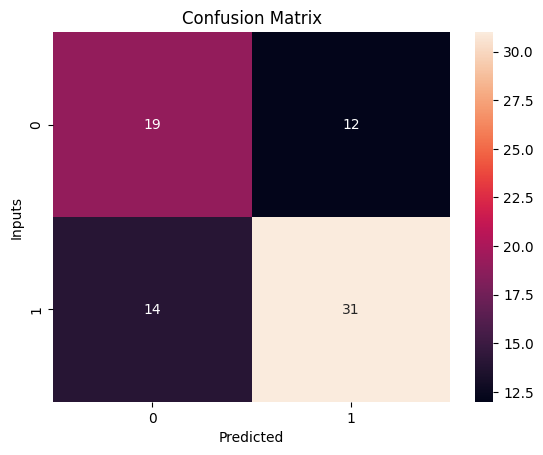

In [33]:
cm = confusion_matrix(y_pred_csv, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Inputs")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [37]:
params = {
    'C': [0, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['auto', 0.1]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [38]:
gsh.fit(X, y)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10], 'gamma': ['auto', 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=10)

In [39]:
gsh.best_score_

0.8282720460090623

In [40]:
gsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [41]:
gsh.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [42]:
refit=True
gsh.refit
gsh.predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [43]:
gsh.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [45]:
svc_final = SVC(C=1, gamma='auto', kernel='linear')
svc_final.fit(X, y)

SVC(C=1, gamma='auto', kernel='linear')

age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal

In [47]:
def get_specefic_value_for_new_data():
  age=float(input("please insert a valid age:"))
  sex=float(input("please insert a valid sex:"))
  cp=float(input("please insert a valid cp:"))
  trestbps=float(input("please insert a valid trestbps:"))
  chol=float(input("please insert a valid  chol:"))
  fbs=float(input("please insert a valid fbs:"))
  restecg=float(input("please insert a valid restecg:"))
  thalach=float(input("please insert a valid thalach:"))
  exang=float(input("please insert a valid exang:"))
  oldpeak=float(input("please insert a valid oldpeak:"))
  slope=float(input("please insert a valid slope:"))
  ca=float(input("please insert a valid ca:"))
  thal=float(input("please insert a valid thal:"))
  new_data=dict()
  new_data['age']=age
  new_data['sex']=sex
  new_data['cp']=cp
  new_data['trestbps']=trestbps
  new_data['chol']=chol
  new_data['fbs']=fbs
  new_data['restecg']=restecg
  new_data['thalach']=thalach
  new_data['exang']=exang
  new_data['oldpeak']=oldpeak
  new_data['slope']=slope
  new_data['ca']=ca
  new_data['thal']=thal


  # df_new_data_faram = pd.DataFrame(farme_data, columns=test_dataframe_name.columns)
  return new_data

In [48]:
new_data_fram=get_specefic_value_for_new_data()

please insert a valid age:41
please insert a valid sex:1
please insert a valid cp:2
please insert a valid trestbps:125
please insert a valid  chol:190
please insert a valid fbs:0
please insert a valid restecg:160
please insert a valid thalach:0
please insert a valid exang:1.5
please insert a valid oldpeak:1.5
please insert a valid slope:2
please insert a valid ca:0
please insert a valid thal:1


In [49]:
df2=pd.DataFrame.from_dict([new_data_fram])

In [53]:
y_pred_final = svc_final.predict(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [54]:
y_pred_final

array([1])

In [55]:
y_pred_first_model = svc_model.predict(df2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [56]:
y_pred_first_model

array([1])